<a href="https://colab.research.google.com/github/kevincong95/cs231n-emotiw/blob/master/audio/openl3_audio_api-wi-val-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio API

In [0]:
class audio_model:
    def __init__(self):
        self.model = ()
        return

    def predict(self, mp4_filepath , target_filepath ):
        X , y = self.get_feature_batch(mp4_filepath , target_filepath) #Preproccess 
        X = np.asarray(X) #You may get a bug TODO: trimming 

        soft_pred = self.model.predict(X)


        return soft_pred # (0.1 ,0.2 , 0.7)


      

    def load_model(self, best_model_filepath):
        self.model = load_model(best_model_filepath)
        
        return  

    def train(self, X_train , y_train , epochs=500 , batch_size=32 , X_val=None , Y_val=None , val_split=0.1, save_path = None):

        """

        Train function with the model architecture

        - Outputs
          1. Trained model -- saves the model as a .h5 file to the specified path

        """


        #TODO: There are some bugs here 
        # Next Steps:
        # 1. Transfer learning
        # 2. Try CNN-LSTM approach 
        # 3. For deep networks, try residual blocks
        # 4. Look for other model architecture to use with openSmile/VggISH/mel-spec features 

    
        inputs = keras.Input(shape=[11,6144])

        cnn1 =  tf.keras.layers.Conv1D(
        512, 3, activation='selu')

        maxpool_1 = tf.keras.layers.MaxPooling1D(pool_size=2,
   strides=1, padding='valid')
        
        dropout_1 = tf.keras.layers.Dropout(0.3)

        cnn2 =  tf.keras.layers.Conv1D(
        512, 3, activation='selu')

        maxpool_2 = tf.keras.layers.MaxPooling1D(pool_size=2,
   strides=1, padding='valid')
        
        dropout_2 = tf.keras.layers.Dropout(0.3)

        cnn3 =  tf.keras.layers.Conv1D(
        512, 3, activation='selu')
         

        maxpool_3 = tf.keras.layers.MaxPooling1D(pool_size=2,
   strides=1, padding='valid')
         
        dropout_3 = tf.keras.layers.Dropout(0.3)

        




  
        recurrent_1 = keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True, input_shape=[None, 6144] ,  dropout=0.2 , activation='selu')) #A sequence of any length with dimensions 512 (i.e. 512 columns
        recurrent_2 = keras.layers.Bidirectional(keras.layers.LSTM(5))
        dense_1 = keras.layers.Dense(32 , activation='selu')
        dropout_1 = keras.layers.Dropout(0.5)
        softmax = keras.layers.Dense(3 , activation='softmax')
        
        inputs = keras.Input(shape=[11,6144])
        x = cnn1(inputs)
        x = maxpool_1(x)
        x = dropout_1(x)
        x = cnn2(x)
        x = maxpool_2(x)
        x = dropout_2(x)
        x = cnn3(x)
        x = maxpool_3(x)
        x = dropout_3(x)
        x = recurrent_1(x)
        x = recurrent_2(x)
        x = dense_1(x)
        x = dropout_1(x)
        outputs = softmax(x)


        recurrent_1 = keras.layers.Bidirectional(keras.layers.LSTM(10, return_sequences=True, input_shape=[None, 6144] , dropout=0.2 , activation='selu')) #A sequence of any length with dimensions 512 (i.e. 512 columns
        recurrent_2 = keras.layers.Bidirectional(keras.layers.LSTM(5))
        dense_1 = keras.layers.Dense(32 , activation='selu')
        dropout_1 = keras.layers.Dropout(0.5)
        softmax = keras.layers.Dense(3 , activation='softmax')

        # x = recurrent_1(inputs)
        # x = recurrent_2(x)
        # x = dense_1(x)
        # x = dropout_1(x)
        # outputs = softmax(x)

        rnn_ae = keras.Model(inputs=inputs, outputs=outputs)

        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-6,
        decay_steps=10000,
        decay_rate=0.9)
        opt = keras.optimizers.Adam(learning_rate=lr_schedule)

        rnn_ae.compile(loss='sparse_categorical_crossentropy' , optimizer=opt , metrics=['accuracy'])

        history = None 

        # if X_val == None and Y_val == None:
        #   es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
        #   mc = ModelCheckpoint(save_path, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        #   history = rnn_ae.fit(X_train , y_train , epochs=4000 , batch_size=batch_size,  validation_split=val_split , callbacks=[es, mc])

        # else:
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
        mc = ModelCheckpoint(save_path, monitor='val_acc', mode='max', verbose=1, save_best_only=True)
        history = rnn_ae.fit(X_train , y_train , epochs=4000 , batch_size=batch_size,  validation_data=(X_val, Y_val), callbacks=[es, mc])


        if save_path != None:
          assert save_path[-3:] == '.h5'
          rnn_ae.save(save_path)
        return rnn_ae , history

    def preprocess(self, mp4_file_dr , target_label_path=None , hop_int=1):

      """
      Outputs:
      - A numpy array with dimensions (m,n). 
        - m is the units in time dependent on the audio splice rate.
        - n is the number of features from the openSMILE library.
      """

 

      
      
      # mp4_filename = os.path.basename(mp4_filepath)
      # audio_home_dir = os.path.dirname(mp4_filepath)

      # Strip the audio from video and store as .wav file
      video_files = sorted(glob.glob(mp4_file_dr + '/*.mp4'))
      targets = []
      target_labels = np.genfromtxt(target_label_path , delimiter = ' ' , dtype='str')
    
      counter = -1

      for f in video_files: 


        counter += 1 

        if counter >= 1000:
          continue;

        print(f"Processing file {f} ...")
        newname = f.split("/")[1]
        output_wav_file = newname + 'extracted_audio.wav'
        ffmpeg_extract_audio(f , output_wav_file)
        if target_label_path is not None:        
            target_index = np.where(target_labels[: , 0] == newname[:-4])[0]
            target_index = int(target_index)
            target = int(target_labels[: , 1][target_index])
            targets.append(target)




      
      audio_files = sorted(glob.glob('*.wav'))
      audio_reads = []
      sr = 0
      for audio_file in audio_files:
        print(f"Reading file {audio_file} ...")
        audio_read , sr = sf.read(audio_file)
        audio_reads.append(audio_read)
      targets = np.asarray(targets)
      targets -= 1
      X_arr , ts_list = openl3.get_audio_embedding(audio_reads, sr, batch_size=15 ,  hop_size=0.5)

      subprocess.check_output("rm *.wav", shell=True)

      X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_arr , maxlen=11)
      X_train_padded = np.asarray(X_train_padded , dtype='float32')
      print(X_train_padded.shape)

      return X_train_padded , sr , targets


      # Read in each video file and add the (m,n) feature matrix to a 3D array

   

# Main Method

In [3]:
#if __name__ == "__main__":
%tensorflow_version 1
import subprocess

subprocess.check_output("pip install pydub", shell=True)
subprocess.check_output("pip install openl3" , shell=True)

from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)



from tensorflow.keras.models import load_model
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_audio
import glob
import time
import importlib
from sklearn.preprocessing import StandardScaler , Normalizer
from subprocess import Popen, PIPE, STDOUT
import librosa
import os
import pickle
import openl3
import soundfile as sf
import importlib
importlib.reload(openl3)


from pydub import AudioSegment
import argparse
import audioread
import time
import numpy as np
import subprocess
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
import tensorflow as tf

from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional



#Instantiate audio_model object
model_test = audio_model()

  #Extract and preprocess X_train and Y_train from .mp4 file paths

  # subprocess.check_output("cp '/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Train.zip' '/content/'", shell=True)
  # subprocess.check_output("unzip Train.zip", shell=True)
  # subprocess.check_output("mkdir to_zip", shell = True)


  # X_train_save_path = "" # Enter .pickle path
  # Y_train_save_path = "" # Enter .pickle path



  # subprocess.check_output("cp '/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/datasets/emotiw/Train_labels.txt' '/content/'", shell=True)
  # X_train, sr , Y_train = model_test.preprocess('Train/' , target_label_path='Train_labels.txt')
  # with open(X_train_save_path, 'wb') as f:
  #   pickle.dump(X_train, f) 
  # with open(Y_train_save_path, 'wb') as f:
  #   pickle.dump(Y_train, f)   

  #Train the model


  # MAKE SURE TO CHANGE THE SAVE PATH

  # Model_path = ""

  # model_test = audio_model()
  # model, history = model_test.train(X_train, Y_train , save_path=Model_path )



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
Mounted at /content/gdrive


In [9]:
import numpy as np
X_train = np.load("/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/arrays/np_arrays/100ms-11-unit-seq-openl3.x_val-0.5-hop-ALL_TRAIN_SAMPLES.pickle" , allow_pickle=True)
Y_train = np.load("/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/arrays/np_arrays/100ms-11-unit-seq-openl3.y_train-0.5-hop-ALL_TRAIN_SAMPLES.pickle", allow_pickle=True)
X_val = np.load("/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/arrays/np_arrays/100ms-11-unit-seq-openl3.x_train-0.5-hop-ALL_VAL_SAMPLES.pickle" , allow_pickle=True)
Y_val = np.load("/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/arrays/np_arrays/100ms-11-unit-seq-openl3.y_val-0.5-hop-ALL_VAL_SAMPLES.pickle", allow_pickle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)


(2661, 11, 6144)
(2661,)
(766, 11, 6144)
(766,)


In [0]:
 # Normalize
from sklearn.preprocessing import Normalizer
X_train_copy = X_train
X_val_copy = X_val
scaler = Normalizer()

for i in range(0,X_train_copy.shape[0]):
  X_train_copy[i] = scaler.fit_transform(X_train_copy[i])

for i in range(0,X_val_copy.shape[0]):
  X_val_copy[i] = scaler.fit_transform(X_val_copy[i])
  

In [17]:
model_test = audio_model()
Model_path = "" # enter your model path here

Model_path = "/content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/models/OPENL3_audio_api_train_test-1-500-epochs-0.5_hop--BEST_MODEL-w-VAL--1e-6-lr.h5"
model, history = model_test.train(X_train_copy, Y_train , X_val=X_val_copy , Y_val=Y_val ,  save_path=Model_path )



Train on 2661 samples, validate on 766 samples
Epoch 1/4000
2656/2661 [============================>.] - ETA: 0s - loss: 1.1004 - acc: 0.3245
Epoch 00001: val_acc improved from -inf to 0.29765, saving model to /content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/models/OPENL3_audio_api_train_test-1-500-epochs-0.5_hop--BEST_MODEL-w-VAL--1e-6-lr.h5
2661/2661 [==============================] - 10s 4ms/sample - loss: 1.1004 - acc: 0.3243 - val_loss: 1.0989 - val_acc: 0.2977
Epoch 2/4000
2656/2661 [============================>.] - ETA: 0s - loss: 1.0988 - acc: 0.3336
Epoch 00002: val_acc improved from 0.29765 to 0.32768, saving model to /content/gdrive/My Drive/Machine-Learning-Projects/cs231n-project/notebooks/audio-new/models/OPENL3_audio_api_train_test-1-500-epochs-0.5_hop--BEST_MODEL-w-VAL--1e-6-lr.h5
2661/2661 [==============================] - 3s 1ms/sample - loss: 1.0988 - acc: 0.3337 - val_loss: 1.0988 - val_acc: 0.3277
Epoch 3/4000
2656/2661 [=====

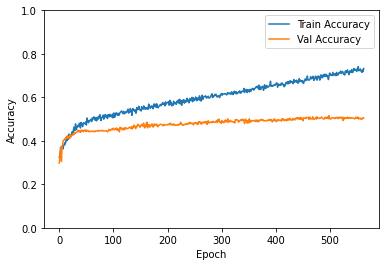

In [25]:
import pandas as pd
from matplotlib import pyplot as plt



def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)